# Get the Marmousi model and store locally
We will use a subsampled version of the Marmousi for modeling and inversion demos. 

#### Please note:
* The Marmousi 2 model is provided by the Allied Geophysical Laboratory of the University of Houston, license and more information at the SEG wiki entry 
[AGL Elastic Marmousi](https://wiki.seg.org/wiki/AGL_Elastic_Marmousi).
* If you run these notebooks you will have a copy of the license to review in this directory.
* We use the Georgia Tech SLIM group's `SegyIO` package, which must be added to your environment. Please see the first notebook if you do not have this package loaded.  [https://slim.gatech.edu](https://slim.gatech.edu).

## Download tar file from AWS

In [1]:
download("https://s3.amazonaws.com/open.source.geoscience/open_data/elastic-marmousi/elastic-marmousi-model.tar.gz", joinpath(pwd(),"elastic-marmousi-model.tar.gz"))

"/home/cvx/.julia/dev/Examples/20_marmousi_model_setup/elastic-marmousi-model.tar.gz"

## Extract tarball using shell

In [2]:
;tar -xzvf elastic-marmousi-model.tar.gz

elastic-marmousi-model/model/
elastic-marmousi-model/processed_data/SEGY-Time/Kirchhoff_PoSTM_time.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Time/SYNTHETIC_time.segy.tar.gz
elastic-marmousi-model/model/LAYER_PROPERTIES.pdf
elastic-marmousi-model/processed_data/SEGY-Depth/SYNTHETIC.segy.tar.gz
elastic-marmousi-model/processed_data/
elastic-marmousi-model/processed_data/SEGY-Depth/Kirchhoff_PreSDM.segy.tar.gz
elastic-marmousi-model/model/FINAL_HORIZONS.asc
elastic-marmousi-model/model/FINAL_HORIZONS_GX2.asc
elastic-marmousi-model/processed_data/SEGY-Depth/Kirchhoff_PoSDM.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Time/NMOstack_SRME_time.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/Vs.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/NMOstack.segy.tar.gz
elastic-marmousi-model/processed_data/SEGY-Depth/WE_PreSDM.segy.tar.gz
elastic-marmousi-model/reports/
elastic-marmousi-model/processed_data/SEGY-Time/
elastic-marmousi-model/model/MODEL

## Extract the acoustic velocity model `.segy` file using shell

In [3]:
;tar -xzvf elastic-marmousi-model/model/MODEL_P-WAVE_VELOCITY_1.25m.segy.tar.gz

MODEL_P-WAVE_VELOCITY_1.25m.segy


## Extract the acoustic velocity from the `.segy` file 
1. Read in segy
1. Downsample the model
1. Write binary file to local disk

In [4]:
using SegyIO

In [5]:
model = segy_read("MODEL_P-WAVE_VELOCITY_1.25m.segy");

┌ Warning: Fixed length trace flag set in stream: IOBuffer(data=UInt8[...], readable=true, writable=false, seekable=true, append=false, size=155653444, maxsize=Inf, ptr=3601, mark=-1)
└ @ SegyIO /home/cvx/.julia/packages/SegyIO/HHmmZ/src/read/read_file.jl:26


In [6]:
trcs = Float32.(model.data);
trcs_20m = trcs[1:16:end,1:16:end];

In [7]:
write("marmousi_vp_20m_176x851.bin",trcs_20m);

## Check to make sure the model looks correct

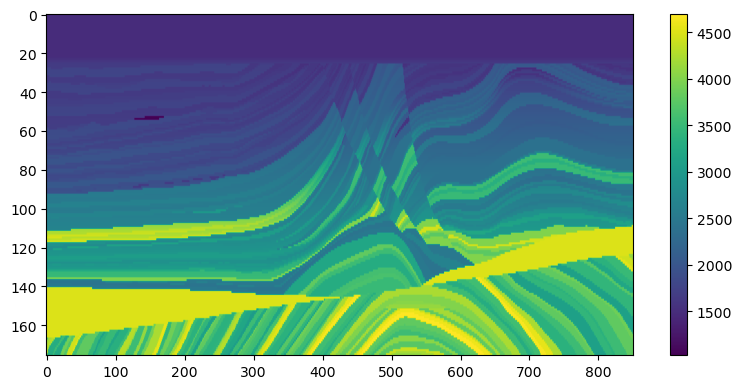

In [8]:
using PyPlot
figure(1, figsize=(8,4))
vmin,vmax = extrema(trcs_20m)
imshow(trcs_20m, clim=[vmin,vmax], aspect="auto");
colorbar();
tight_layout();

## Keep the downloaded files to preserve the license
We leave the files we downloaded and the directory we extracted.